In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas
from IPython.display import display

In [2]:
adult_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Adult.csv")
adult_df = adult_df.set_index("Adult")
compas_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Compas.csv")
compas_df = compas_df.set_index("Compas")
bank_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Bank.csv")
bank_df = bank_df.set_index("Bank")
german_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data German.csv")
german_df = german_df.set_index("German")

for df in [adult_df, compas_df, bank_df, german_df]:
    df["False Positive Rate Diff"] = df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"]
    df["False Negative Rate Diff"] = df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"]
    df["Accuracy Diff"] = df["Accuracy - Unprivileged"] - df["Accuracy - Privileged"]
    df["False Omission Rate Diff"] = df["False Omission Rate - Unprivileged"] - df["False Omission Rate - Privileged"]
    df["False Discovery Rate Diff"] = df["False Discovery Rate - Unprivileged"] - df["False Discovery Rate - Privileged"]
    df["Statistical Parity Diff"] = df["Base Rate - Unprivileged"] - df["Base Rate - Privileged"]
    df["F1 Score Diff"] = df["F1 Score - Unprivileged"] - df["F1 Score - Privileged"]
    for metric in df.columns:
        if "Num" in metric or "rivileged" in metric:
            df.drop(metric, axis=1, inplace=True)
    df.set_index = df[df.columns[0]]
    

In [3]:
def num_interventions(name):
    if name == "Logistic Regression" or name  == "Meta Classifier":
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3

In [4]:
no_int = []
one_int = []
two_int = []
three_int = []
for row in list(adult_df.index):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
vals_no_int = []
vals_one_int = []
vals_two_int = []
vals_three_int = []
#for col in adult_df.columns:
    

In [5]:
col = adult_df.reindex(columns=["Accuracy"], index=one_int)
display(col)
print(col.sum()/len(col))

,Accuracy
Adult,
RW,0.8359
DIR,0.8326
EGR,0.8165
GSR,0.7561
PR,0.8200
CEOP,0.8243
ROC,0.7675
EOP,0.8103


Accuracy    0.8079
dtype: float64


In [6]:
metric = "Accuracy"
col = adult_df.reindex(columns=[metric], index=no_int)
vals = [float(col.sum()/len(col))]
col = adult_df.reindex(columns=[metric], index=one_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=two_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=three_int)
vals.append(float(col.sum()/len(col)))
heatmap_df = pandas.DataFrame(data=vals, columns=['Accuracy - Adult'])

for metric in adult_df.columns:
    if metric == "Adult" or metric == "Accuracy":
        continue
    col = adult_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = adult_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Adult"] = vals
    
for metric in compas_df.columns:
    if metric == "Compas":
        continue
    col = compas_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = compas_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Compas"] = vals
    
for metric in bank_df.columns:
    if metric == "Bank":
        continue
    col = bank_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = bank_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Bank"] = vals

for metric in german_df.columns:
    if metric == "German":
        continue
    col = german_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = german_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - German"] = vals
    
heatmap_df

,Accuracy - Adult,Theil Index - Adult,Consistency - Adult,F1 Score - Adult,False Positive Rate Diff - Adult,False Negative Rate Diff - Adult,Accuracy Diff - Adult,False Omission Rate Diff - Adult,False Discovery Rate Diff - Adult,Statistical Parity Diff - Adult,...,Theil Index - German,Consistency - German,F1 Score - German,False Positive Rate Diff - German,False Negative Rate Diff - German,Accuracy Diff - German,False Omission Rate Diff - German,False Discovery Rate Diff - German,Statistical Parity Diff - German,F1 Score Diff - German
0,0.835900,0.138400,0.8384,0.626000,-0.077100,0.108200,0.118000,-0.106700,-0.025800,-0.203000,...,0.183500,0.674,0.801900,-0.057500,0.262100,-0.172000,0.078100,0.158000,-0.126100,-0.211500
1,0.807900,0.140863,0.8384,0.596125,-0.082537,0.151800,0.103612,-0.099325,-0.007512,-0.177625,...,0.203400,0.674,0.781075,-0.036925,0.180188,-0.133500,0.062200,0.151837,-0.120550,-0.165150
2,0.788538,0.150200,0.8384,0.559471,-0.068871,0.167300,0.090695,-0.100767,0.069752,-0.145000,...,0.215586,0.674,0.768829,-0.047233,0.156671,-0.116000,0.064286,0.150186,-0.113414,-0.148852
3,0.775894,0.162872,0.8384,0.516667,-0.046706,0.142967,0.084194,-0.110500,0.148239,-0.101500,...,0.214328,0.674,0.769239,-0.036606,0.131922,-0.105556,0.071756,0.147750,-0.103900,-0.134106


In [17]:
def isbetter(metric, val1, val2):
    ''' returns true if val2 better than val1'''
    if "Diff" in metric:
        return val2 < val1
    if "Accuracy" in metric or "F1" in metric or "Base" in metric or "Consistency" in metric:
        return val2 > val1
    return val2 < val1

In [8]:
heatmap = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        temp = []
        for col in heatmap_df.columns:
            temp.append(isbetter(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col]))
        percentage = sum(temp)/len(temp)
        heatmap[i,j] = percentage
display(heatmap)
heatmap = np.flip(heatmap, axis=1)

array([[0.        , 0.29545455, 0.31818182, 0.31818182],
       [0.61363636, 0.        , 0.31818182, 0.29545455],
       [0.63636364, 0.63636364, 0.        , 0.38636364],
       [0.63636364, 0.65909091, 0.54545455, 0.        ]])

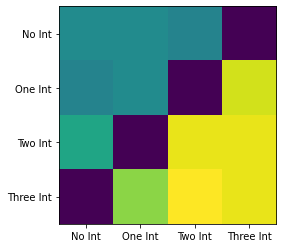

In [9]:
ints = ["No Int", "One Int", "Two Int", "Three Int"]
fig, ax = plt.subplots()
im = ax.imshow(heatmap)
ax.set_xticks(np.arange(len(ints)))
ax.set_yticks(np.arange(len(ints)))
ax.set_xticklabels(ints)
ax.set_yticklabels(ints)
plt.show()

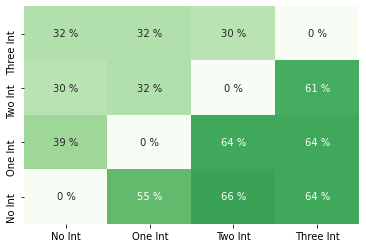

In [10]:
ax = sns.heatmap(heatmap*100, cmap='Greens', vmin=0, vmax=100, xticklabels=ints, yticklabels=ints[::-1], annot=True, cbar=False)
#cbar = ax.collections[0].colorbar
#cbar.set_ticks([0, 20, 40, 60, 80, 100])
#cbar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
for t in ax.texts:
    t.set_text(t.get_text() + " %")

In [29]:
metric = "Accuracy"
col = adult_df.reindex(columns=[metric], index=no_int)
vals = [float(col.sum()/len(col))]
col = adult_df.reindex(columns=[metric], index=one_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=two_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=three_int)
vals.append(float(col.sum()/len(col)))
heatmap_df = pandas.DataFrame(data=vals, columns=['Accuracy - Adult'])

util_metrics = ["Accuracy", "Theil Index", "F1 Score"]


for metric in util_metrics:
    col = adult_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = adult_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Adult"] = vals
    
for metric in util_metrics:
    col = compas_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = compas_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Compas"] = vals
    
for metric in util_metrics:
    col = bank_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = bank_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Bank"] = vals

for metric in util_metrics:
    col = german_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = german_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - German"] = vals
    
heatmap_df

,Accuracy - Adult,Theil Index - Adult,F1 Score - Adult,Accuracy - Compas,Theil Index - Compas,F1 Score - Compas,Accuracy - Bank,Theil Index - Bank,F1 Score - Bank,Accuracy - German,Theil Index - German,F1 Score - German
0,0.835900,0.138400,0.626000,0.658000,0.194200,0.705400,0.901200,0.084500,0.518600,0.723300,0.183500,0.801900
1,0.807900,0.140863,0.596125,0.645200,0.211262,0.689375,0.893500,0.097388,0.401325,0.698725,0.203400,0.781075
2,0.788538,0.150200,0.559471,0.627171,0.244605,0.655662,0.888581,0.103781,0.335419,0.686181,0.215586,0.768829
3,0.775894,0.162872,0.516667,0.604867,0.285061,0.613183,0.886244,0.108972,0.279650,0.687967,0.214328,0.769239


In [30]:
def isworse(metric, val1, val2):
    ''' returns true if val2 worse than val1'''
    if "Diff" in metric:
        return val2 > val1
    if "Accuracy" in metric or "F1" in metric or "Base" in metric or "Consistency" in metric:
        return val2 < val1
    return val2 > val1

In [39]:
heatmap = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        temp = []
        for col in heatmap_df.columns:
            temp.append(isworse(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col]))
            print(isworse(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col]), ints[i], ints[j])
            print(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col])
        percentage = sum(temp)/len(temp)
        heatmap[i,j] = percentage
        print(percentage)

heatmap = np.flip(heatmap, axis=1)
display(heatmap)

False No Int No Int
Accuracy - Adult 0.8359 0.8359
False No Int No Int
Theil Index - Adult 0.1384 0.1384
False No Int No Int
F1 Score - Adult 0.626 0.626
False No Int No Int
Accuracy - Compas 0.6579999999999999 0.6579999999999999
False No Int No Int
Theil Index - Compas 0.1942 0.1942
False No Int No Int
F1 Score - Compas 0.7054 0.7054
False No Int No Int
Accuracy - Bank 0.9012 0.9012
False No Int No Int
Theil Index - Bank 0.0845 0.0845
False No Int No Int
F1 Score - Bank 0.5186 0.5186
False No Int No Int
Accuracy - German 0.7233 0.7233
False No Int No Int
Theil Index - German 0.1835 0.1835
False No Int No Int
F1 Score - German 0.8019 0.8019
0.0
True No Int One Int
Accuracy - Adult 0.8359 0.8079
True No Int One Int
Theil Index - Adult 0.1384 0.1408625
True No Int One Int
F1 Score - Adult 0.626 0.596125
True No Int One Int
Accuracy - Compas 0.6579999999999999 0.6452
True No Int One Int
Theil Index - Compas 0.1942 0.2112625
True No Int One Int
F1 Score - Compas 0.7054 0.6893750000000001
T

array([[1.  , 1.  , 1.  , 0.  ],
       [1.  , 1.  , 0.  , 0.  ],
       [0.75, 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  ]])

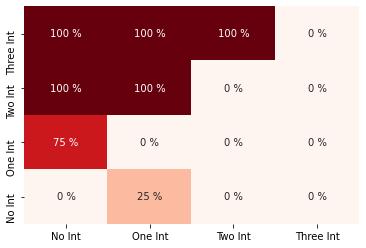

In [40]:
ax = sns.heatmap(heatmap*100, cmap='Reds', vmin=0, vmax=100, xticklabels=ints, yticklabels=ints[::-1], annot=True, cbar=False, fmt='g')
#cbar = ax.collections[0].colorbar
#cbar.set_ticks([0, 20, 40, 60, 80, 100])
#cbar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
for t in ax.texts:
    t.set_text(t.get_text() + " %")